<a href="https://colab.research.google.com/github/raulbenitez/HSJD_neuropaisajes/blob/master/prueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import os

root_folder = '/content/gdrive/My Drive/NEUROPAISAJES_python/data1'

for root, dirs, files in os.walk(root_folder, topdown=False):
    for name in files:
        print(os.path.join(root, name))

        


/content/gdrive/My Drive/NEUROPAISAJES_python/data1/p62_CONTROL-4m_BASAL_02-copia.lif
/content/gdrive/My Drive/NEUROPAISAJES_python/data1/p62_MED13-p.L830R_BASAL_05.lif
/content/gdrive/My Drive/NEUROPAISAJES_python/data1/p62_CHKB-p.Q198_BAF_02.lif
/content/gdrive/My Drive/NEUROPAISAJES_python/data1/p62_MFN2-p.R104W_BASAL_01.lif


In [5]:
!pip install python-bioformats

     |████████████████████████████████| 30.8MB 135kB/s 
     |████████████████████████████████| 1.4MB 30.7MB/s 
  Created wheel for python-bioformats: filename=python_bioformats-1.5.2-cp36-none-any.whl size=30557985 sha256=3cbcb6d45dae44eed16ba81c5ba5bf5ae5bef092b9ddfeaa180b857b7a07d381
  Stored in directory: /root/.cache/pip/wheels/21/cc/11/9c4d19df37db114a5cba1c7043f7586e067389078da88c40cf
  Created wheel for javabridge: filename=javabridge-1.0.19-cp36-cp36m-linux_x86_64.whl size=1636063 sha256=1cc4dcb5da1eafcce0440e41d62052d764fe97c59e6123e4f72fcf5b9c46fb5a
  Stored in directory: /root/.cache/pip/wheels/3f/c3/06/e0ebe937afde69a1e691dde266bde0b67886c4edfa1479fb49
Successfully built python-bioformats javabridge


In [0]:
import bioformats

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

module3 = drive.CreateFile({'id':'1Sz3XOztm-4iDdsJDdklEHuiJiXUFgA5T'})
module3.GetContentFile('read_lif.py')

In [0]:
import read_lif

filepath = os.path.join(root, files[0])

reader = read_lif.Reader(filepath)
series = reader.getSeries()

In [0]:
import matplotlib.pyplot as plt
import skimage as sk # load skimage libraries
from skimage import io, filters


Ir = series[0].getFrame(T=0, channel=0)


In [33]:
Ir.shape

(1024, 1024, 10)

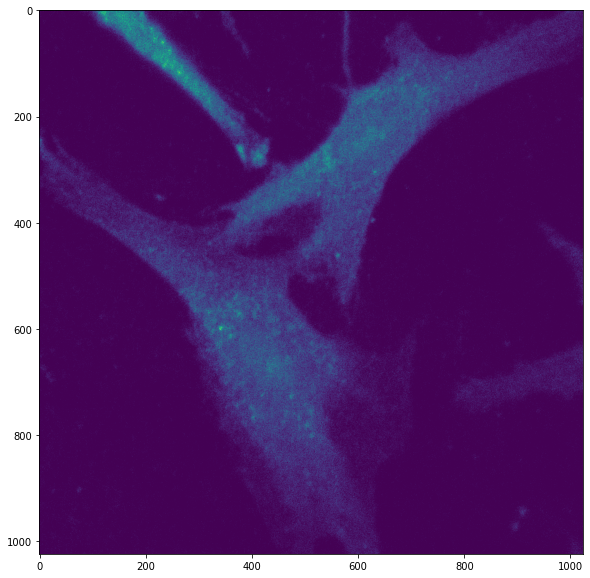

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
plt.imshow(Ir[:,:,0]) # visualize image using imshow function
plt.show()

In [36]:
Imax = Ir.max(axis=2)
Imax.shape

(1024, 1024)

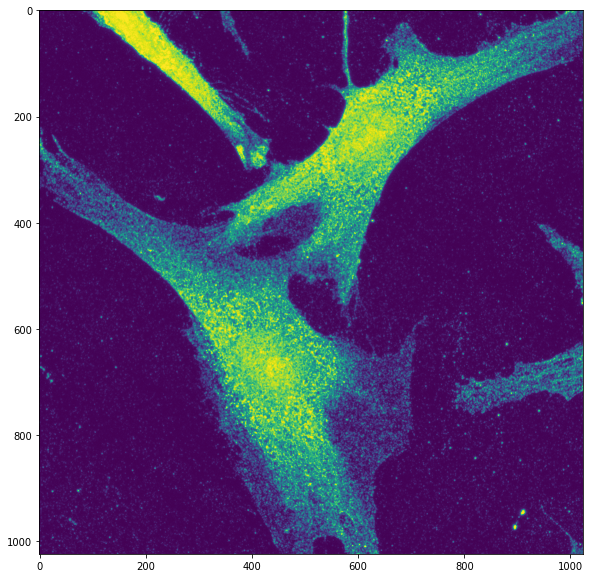

In [37]:
fig = plt.figure(figsize=(10,10))
plt.imshow(Imax) # visualize image using imshow function
plt.show()

In [43]:
import numpy as np

v = np.reshape(Imax,(1,Imax.shape[0]*Imax.shape[1]))

v.shape

(1, 1048576)

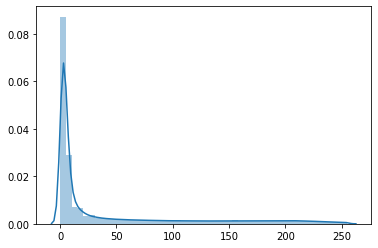

In [46]:
import seaborn as sns
sns.distplot(v)
plt.show()

In [47]:
from skimage.feature import peak_local_max
coordinates = peak_local_max(Imax, min_distance=5)
coordinates.shape

(9252, 2)

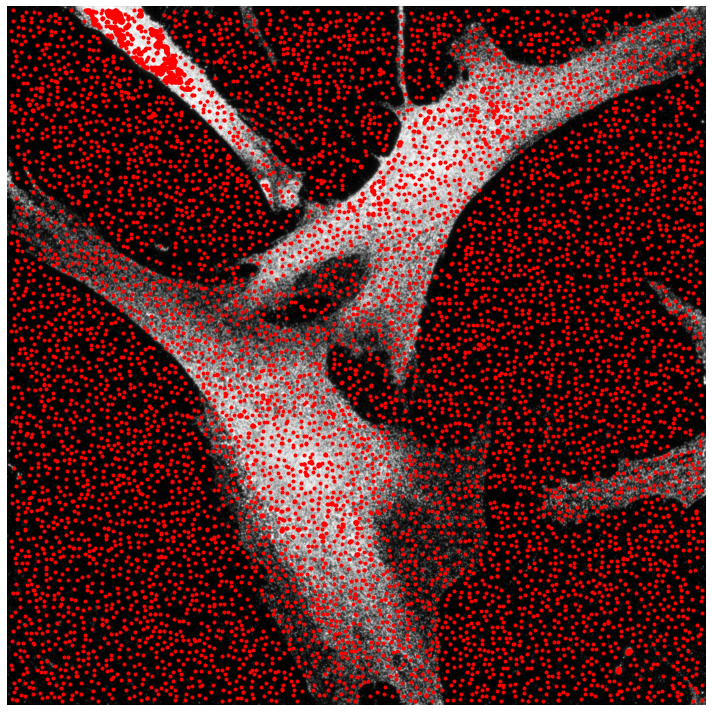

In [51]:
# display results
fig = plt.figure(figsize=(10,10))
plt.imshow(Imax, cmap=plt.cm.gray)
plt.autoscale(False)
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
plt.axis('off')


fig.tight_layout()

plt.show()

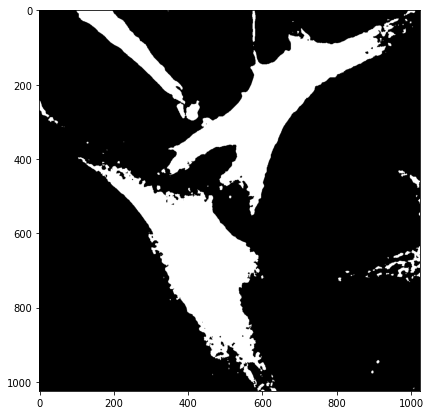

In [58]:
from skimage.filters import median, threshold_otsu
from skimage.morphology import disk


sel1 = disk(5) # structuring element disk radius 5 pixels
Imaxf = median(Imax, sel1)


# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(Imaxf)

# Apply threshold to test image:
I_otsu = Imaxf >= threshold_otsu

fig = plt.figure(figsize=(7, 7))

plt.imshow(I_otsu, cmap=plt.cm.gray)
plt.show()

In [0]:
from skimage.filters import threshold_local
Ilocal_mean = threshold_local(Imaxf, 15, 'mean')


func = lambda arr: arr.std()
Ilocal_std = threshold_local(Imaxf, 15, 'generic',param=func)

In [0]:
def plot_comparison(original, filtered):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('image 1')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title('image 2')
    ax2.axis('off')

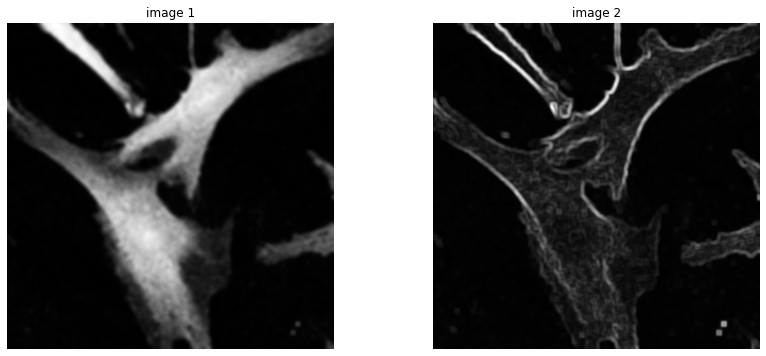

In [67]:
plot_comparison(Ilocal_mean,Ilocal_std)